In [1]:
import numpy as np

In [31]:
MAX_ITEMS = 100
MAX_T = 500

actions = np.asarray([200.0, 100.0, 50.0])
p = np.asarray([0.1, 0.5, 0.8])
p_matrix = np.asarray([p, 1 - p])
v_matrix = np.zeros(shape=(MAX_ITEMS + 1, MAX_T + 1))
alpha_matrix = np.ones(shape=v_matrix.shape) * 99

for t in range(1, MAX_T + 1):
    a = (p * actions) + np.asarray([v_matrix[:-1, t - 1], v_matrix[1:, t - 1]]).T.dot(p_matrix)
    v_matrix[1:, t] = np.max(a, axis=1)
    alpha_matrix[1:, t] = np.argmax(a, axis=1)
    

In [32]:
v_matrix[100, 500]

np.float64(13715.793104897966)

In [3]:
p_matrix

array([[0.1, 0.5, 0.8],
       [0.9, 0.5, 0.2]])

In [4]:
alpha_matrix[alpha_matrix == 2]

array([], dtype=float64)

In [5]:
100 * 200

20000

## Plotting the optimal policy

<Axes: >

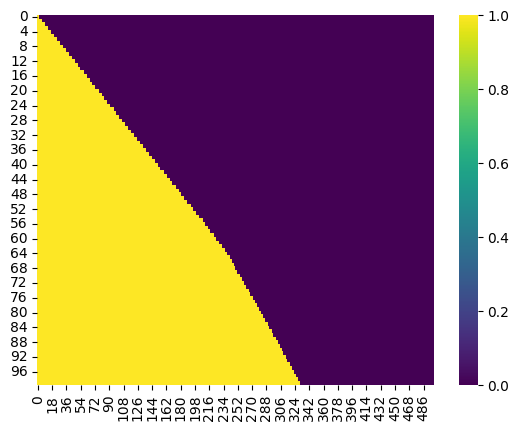

In [6]:
# plot the optimal policy as a heatmap with sns
import seaborn as sns

sns.heatmap(alpha_matrix[1:,1:], cmap='viridis')




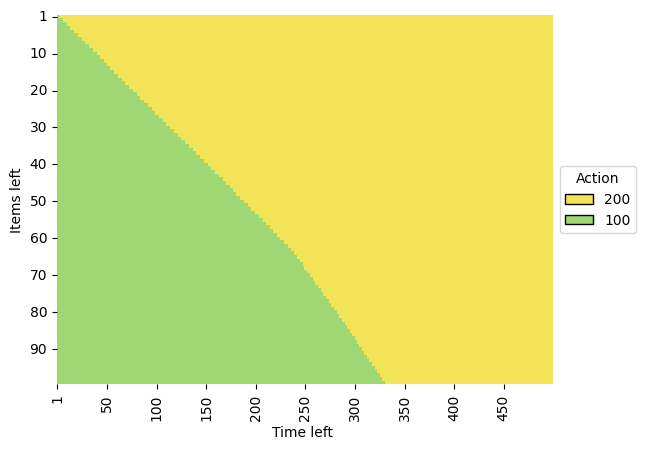

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.heatmap(alpha_matrix[1:,1:], cmap= ["#F3E457","#9FD772"], ax=ax, cbar=False)

ax.set_yticks(np.arange(0, 100, 10) + 0.5) # ticks position

ax.set_yticklabels(np.concatenate([np.asarray([1]), np.arange(10, 100, 10)])) 

ax.set_xticks(np.arange(0, 500, 50) + 0.5)

ax.set_xticklabels(np.concat([np.asarray([1]),  np.arange(50, 500, 50)]))



# set the x and y labels
ax.set_xlabel('Time left ')

ax.set_ylabel('Items left')

# create a legend on the right side of the plot
import matplotlib.patches as mpatches

legend_elements = [mpatches.Patch(facecolor='#F3E457', edgecolor='black', label='200'), mpatches.Patch(facecolor='#9FD772', edgecolor='black', label='100')]

ax.legend(handles=legend_elements, title='Action', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()




## Simulating optimal policy

In [19]:
random_values = np.random.rand(1000, 500)

In [28]:
# Simulate the process 1000 times under the optimal policy. Report the average reward and make a histogram of the rewards. Interpret your results

# create a matrix of random values bewteen 0 and 1

np.random.seed(0)


random_values = np.random.rand(1000, 500)




def simulate_process(ran_vals):
    """
    Parameters:
    ran_vals (list or array-like): A list or array of random values used to determine if an item is sold at each time step.
    Returns:
    int: The total reward accumulated from selling items.

    The function initializes with a certain number of items and a time limit. It iterates through the time steps, 
    checking if the random value at the current time step is less than a probability value from a predefined matrix. 
    If the condition is met, it adds the corresponding action value to the reward and decreases the item count. 
    Otherwise, it decreases the time count. The process continues until there are no items left or the time runs out.
    """
    
    items = 100
    t = 500
    reward = 0
    while items > 0 and t > 0:

        if ran_vals[t-1] < p[int(alpha_matrix[items, t])]:
            reward += actions[int(alpha_matrix[items, t])]
            items -= 1
            t -= 1
        else:
            t -= 1

        
    return reward

rewards = np.asarray([simulate_process(ran_vals) for ran_vals in random_values])

### Plotting the total reward of the simulations

In [30]:
# calculate the average reward

avg_reward = np.mean(rewards)

avg_reward

np.float64(13751.0)

Text(0.5, 1.0, 'Histogram of Rewards')

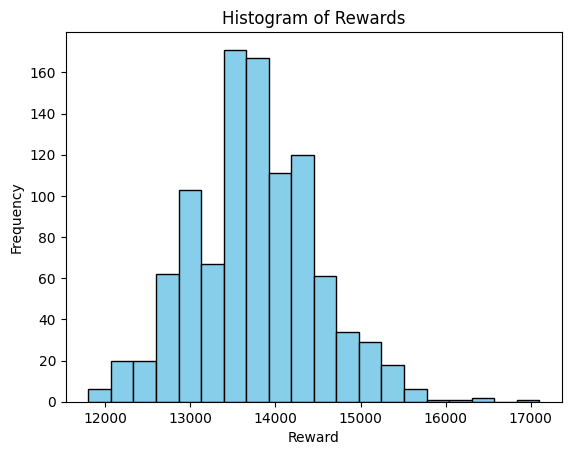

In [31]:
# plot the histogram of the rewards

plt.hist(rewards, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Reward')

plt.ylabel('Frequency')

plt.title('Histogram of Rewards')



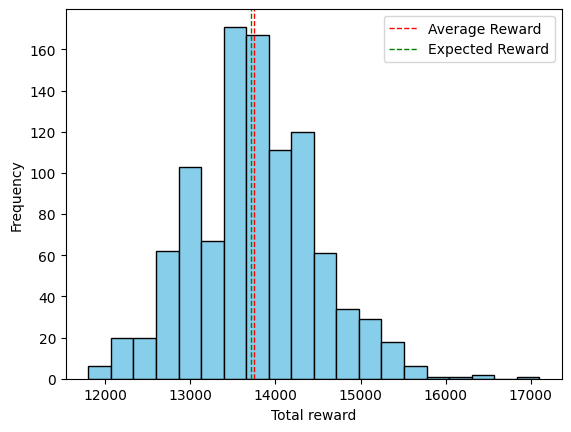

In [33]:
# plot the same graph but add a vertical line at the average reward and one at the expected reward

plt.hist(rewards, bins=20, color='skyblue', edgecolor='black')

plt.axvline(avg_reward, color='red', linestyle='dashed', linewidth=1)

plt.axvline(v_matrix[100, 500], color='green', linestyle='dashed', linewidth=1)

plt.xlabel('Total reward')

plt.ylabel('Frequency')
plt.legend(['Average Reward', 'Expected Reward'])

plt.show()



## New problem definition

In [33]:
#• Now consider a variation of the initial problem, where you are not allowed to increase the price over time. I.e., you are not allowed to change to a higher price than was offered in the previous period

#• Solve the problem under this new constraint. Plot the optimal policy as a heatmap and interpret the results.

num_of_actions = len(actions)

v_matrix = np.zeros(shape=(MAX_ITEMS + 1, num_of_actions, MAX_T + 1))


alpha_matrix = np.empty(shape=v_matrix.shape) 

alpha_matrix[:] = np.nan

for t in range(1, MAX_T + 1):

    last_50 = (p[2] * actions[2]) + np.asarray([v_matrix[:-1,2, t - 1], v_matrix[1:,2, t - 1]]).T.dot(p_matrix[:,2]) # if the last action is 50 only consider the 50 states in the next step

    v_matrix[1:, 2, t] = last_50

    last_100 = np.column_stack([
    (p[1] * actions[1]) + np.asarray([v_matrix[:-1,1, t - 1], v_matrix[1:,1, t - 1]]).T.dot(p_matrix[:,1]),
    (p[2] * actions[2]) + np.asarray([v_matrix[:-1,2, t - 1], v_matrix[1:,2, t - 1]]).T.dot(p_matrix[:,2])])

    v_matrix[1:, 1, t] = np.max(last_100, axis = 1) # if the last action is 100 consider both 50 and 100 states in the next step

    last_200 = np.column_stack([
    (p[0] * actions[0]) + np.asarray([v_matrix[:-1,0, t - 1], v_matrix[1:,0, t - 1]]).T.dot(p_matrix[:,0]),
    (p[1] * actions[1]) + np.asarray([v_matrix[:-1,1, t - 1], v_matrix[1:,1, t - 1]]).T.dot(p_matrix[:,1]),
    (p[2] * actions[2]) + np.asarray([v_matrix[:-1,2, t - 1], v_matrix[1:,2, t - 1]]).T.dot(p_matrix[:,2])])

    v_matrix[1:, 0, t] = np.max(last_200, axis = 1) # if the last action is 200 consider all states in the next step

    alpha_matrix[1:, 2, t] = 2

    alpha_matrix[1:, 1, t] = np.argmax(last_100, axis = 1)

    alpha_matrix[1:, 0, t] = np.argmax(last_200, axis = 1)







In [30]:
# get the expected reward of element (100, 0, 500) in the value matrix

v_matrix[100, 0, 500]

np.float64(13566.465907495229)

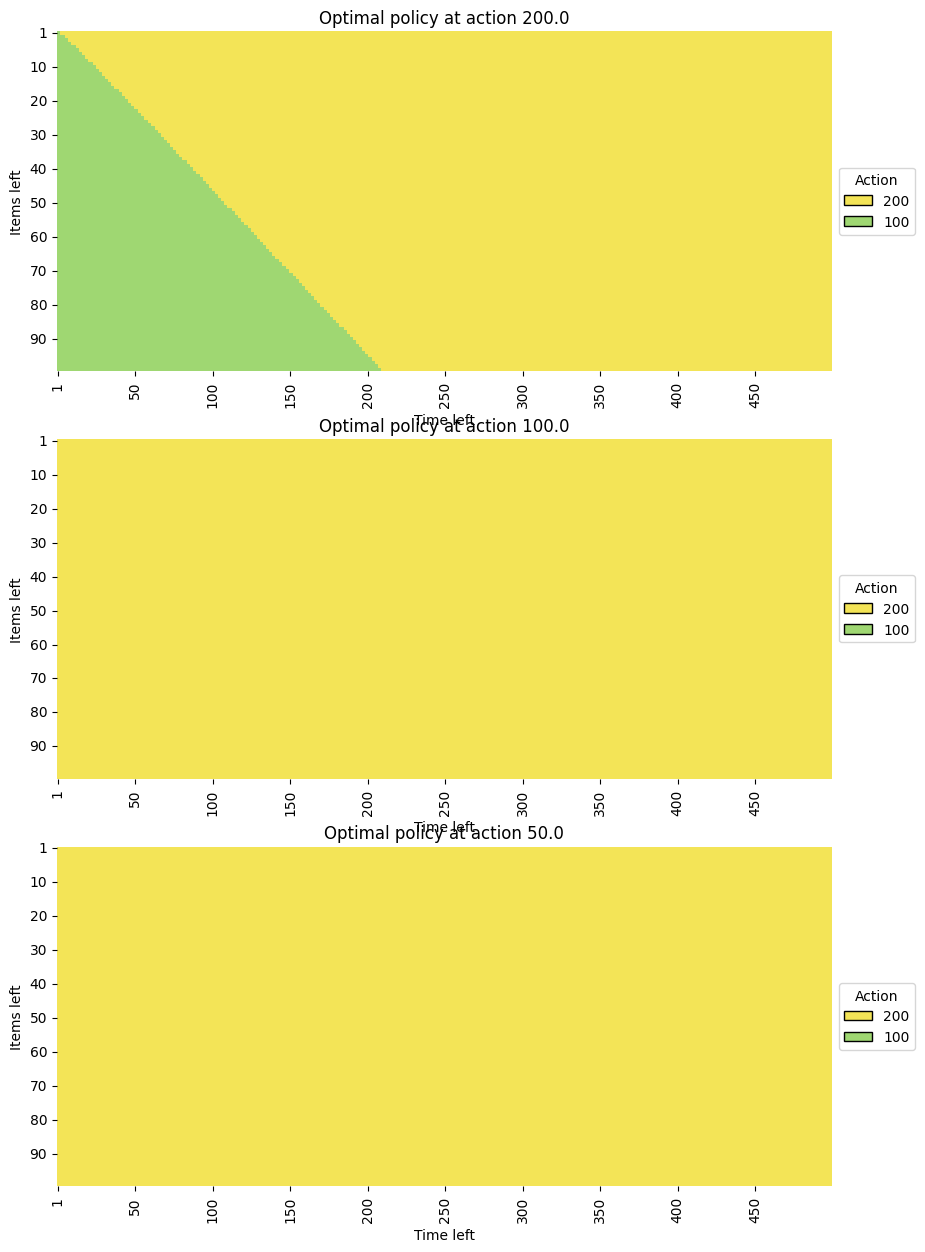

In [48]:
# plot the optimal policy as a heatmap at different time steps

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for i in range(3):

    sns.heatmap(alpha_matrix[1:, i, 1:], cmap= ["#F3E457","#9FD772"], ax=ax[i], cbar=False)

    ax[i].set_yticks(np.arange(0, 100, 10) + 0.5)

    ax[i].set_yticklabels(np.concatenate([np.asarray([1]), np.arange(10, 100, 10)]))

    ax[i].set_xticks(np.arange(0, 500, 50) + 0.5)

    ax[i].set_xticklabels(np.concatenate([np.asarray([1]), np.arange(50, 500, 50)]))

    ax[i].set_xlabel('Time left')

    ax[i].set_ylabel('Items left')

    
    ax[i].legend(handles=legend_elements, title='Action', loc='center left', bbox_to_anchor=(1, 0.5))

    ax[i].set_title(f'Optimal policy at action {actions[i]}')

plt.show()

In [18]:
(p[2] * actions[2]) + np.asarray([v_matrix[:-1,2, t - 1], v_matrix[1:,2, t - 1]]).T.dot(p_matrix[:,2])

array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40.])

In [23]:
#np.concat([np.asarray([0,0,0]), np.asarray([1,2,3])], axis=1)

# perform the concatenation of the dummy arrays correctly on the axis 1 in a 2D array

np.column_stack([np.asarray([0,0,0]), np.asarray([1,2,3]), np.asarray([4,5,6])])



array([[0, 1, 4],
       [0, 2, 5],
       [0, 3, 6]])

In [17]:
np.concat([(p[1] * actions[1]) + np.asarray([v_matrix[:-1,1, t - 1], v_matrix[1:,1, t - 1]]).T.dot(p_matrix[:,1]), (p[2] * actions[2]) + np.asarray([v_matrix[:-1,2, t - 1], v_matrix[1:,2, t - 1]]).T.dot(p_matrix[:,2])], axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [15]:
np.asarray([v_matrix[:-1,1, t - 1], v_matrix[1:,1, t - 1]]).T.dot(p_matrix[:,1]).shape

(100,)

In [13]:
(p[1] * actions[1]) 

np.float64(50.0)